# DSCI 614: Project 1

### Symphony Hopkins

## Introduction

We are part of a data scientist team working for the Department of Transportation. We have built a road condition dashboard. Our manager wants us to have more search data. Our manager lets us monitor the Google Search feeds and get the latest 100 searches regarding the weather. We are asked to perform the following tasks.


## Step 1: Search Google using the keywords "Winter snowstorm". (Please use the sample codes in the attached workbook Google Search extract info (1).ipynb 

We will begin by importing the necessary libraries.

In [1]:
# importing libraries
from googlesearch import search
import pandas as pd

Now, we will provide the arugments for the search function. We want to use "Winter snowstorm" as the query. We also want to return 100 results, including the URL, title, and description. 

In [2]:
#providing the query for the search
query = "Winter snowstorm"

#returning 100 results, including the URL, title, and description 
results = list(search(query, num_results=99, sleep_interval=5, lang="en",advanced=True))

#printing results
print(results)

[SearchResult(url=https://www.weather.gov/safety/winter-during, title=What To Do If You're Caught in a Winter Storm, description=When caught in a winter storm, there are life-saving actions you can take to protect yourself outside, in a vehicle and inside your home or office. +Outside.), SearchResult(url=https://www.weather.gov/safety/winter-snow, title=Snow Storm Safety, description=Blizzard: Sustained winds or frequent gusts of 35 mph or more with snow and blowing snow frequently reducing visibility to less than a quarter mile for 3 hours ...), SearchResult(url=https://www.nssl.noaa.gov/education/svrwx101/winter/types/, title=Severe Weather 101: Winter Weather Types, description=A winter storm is a combination of heavy snow, blowing snow and/or dangerous wind chills. A winter storm is life-threatening. Blizzards are dangerous winter ...), SearchResult(url=https://en.wikipedia.org/wiki/Winter_storm, title=Winter storm, description=A winter storm is an event in which wind coincides wit

## Step 2: Extract the latest 100 results, including the URL, title, and description.

Before we can extract the information, we need to convert the SearchResult objects to a list of strings.

In [3]:
results = [str(item) for item in results]

Now, we can create a for loop and extract the information from the results. After extracting the URL, title, and description from each result, we will store it in a dictionary.

In [4]:
data =[]
for result in results:
    #extracting the URL, title, and description using string manipulation
    url = result.split("url=")[1].split(",")[0]
    title = result.split("title=")[1].split(",")[0]
    description = result.split("description=")[1].split(")")[0]
    
    #creating a dictionary for each SearchResult
    result_dict = {
        'URL': url,
        'Title': title,
        'Description': description
    }
    
    #appending the dictionary to the data list
    data.append(result_dict)

## Step 3: Save the results in a data frame with columns of the URL, title, and description.


Now, we will save the results in a dataframe, and display the first 5 rows.

In [5]:
#creating the dataframe
df = pd.DataFrame(data)
df.head(5)

,URL,Title,Description
0,https://www.weather.gov/safety/winter-during,What To Do If You're Caught in a Winter Storm,"When caught in a winter storm, there are life-..."
1,https://www.weather.gov/safety/winter-snow,Snow Storm Safety,Blizzard: Sustained winds or frequent gusts of...
2,https://www.nssl.noaa.gov/education/svrwx101/w...,Severe Weather 101: Winter Weather Types,"A winter storm is a combination of heavy snow,..."
3,https://en.wikipedia.org/wiki/Winter_storm,Winter storm,A winter storm is an event in which wind coinc...
4,https://scied.ucar.edu/learning-zone/storms/wi...,Winter Storms - UCAR Center for Science Education,Snowstorms are one type of winter storm. Blizz...


In [6]:
df['Description'].to_string()

"0      When caught in a winter storm, there are life-...\n1      Blizzard: Sustained winds or frequent gusts of...\n2      A winter storm is a combination of heavy snow,...\n3      A winter storm is an event in which wind coinc...\n4      Snowstorms are one type of winter storm. Blizz...\n5      Winter storms can bring cold temperatures, pow...\n6      Winter storms can bring extreme cold, freezing...\n7      As Winter Storm Olive moved through Michigan k...\n8      Winter storms in New England can range from fr...\n9      Nov 29, 2022 — Winter storms including blizzar...\n10     Mar 15, 2023 — A major storm dropped more than...\n11     Feb 21, 2023 — Residents in 22 states are unde...\n12     Dec 19, 2022 — Bitterly cold temperatures and ...\n13     Feb 21, 2023 — A massive winter storm bringing...\n14     Mar 15, 2023 — With 4 to 6 inches of snow pred...\n15     Mar 3, 2023 — Our winter snowstorm across Sout...\n16     Dec 12, 2022 — A large winter storm slammed in...\n17     Feb 22

## Step 4: Create a word cloud for the text of these descriptions.

Next, we will create a word cloud to help visualize the most used words from the descriptions. We will start by importing the necessary libraries.

In [7]:
#importing libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

We can now create the word cloud.

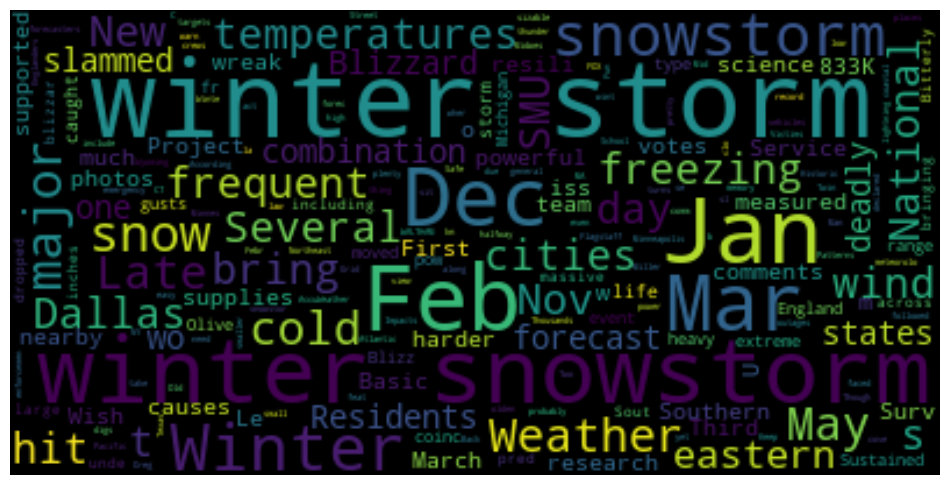

In [8]:
#converting the Panda series to a string
words = df['Description'].to_string()

#creating a word cloud
wordcloud = WordCloud().generate(words)

#visualizing the word cloud
%matplotlib inline
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As we can see, words like "winter storm", "Jan", "Feb", etc. were used frequently in the google searches.

## Step 5: Perform the named entity recognition on the descriptions.

We also want to perform a Named Entity Recogntion (NER) to extract information like names, locations, and dates from the description words. We will begin by importing the necessary libraries.

In [9]:
import spacy
import en_core_web_sm 

Next, we will use the pretrained statistical model, en_core_web_sm, to perform NER.

In [10]:
#loading the pretrained statistical models for English
nlp = en_core_web_sm.load()

#passing the words to the pretrained statistical model
doc = nlp(words)

#displaying all the NERs
if doc.ents: #if there are some entities, print them out
    for ent in doc.ents:
        print(f'{ent.text} : {ent.label_} - {spacy.explain(ent.label_)}')
else: # no name entities found
    print(f'I can not find any name entities!')

1      Blizzard: : QUANTITY - Measurements, as of weight or distance
2       : QUANTITY - Measurements, as of weight or distance
3       : QUANTITY - Measurements, as of weight or distance
4 : CARDINAL - Numerals that do not fall under another type
one : CARDINAL - Numerals that do not fall under another type
5 : CARDINAL - Numerals that do not fall under another type
6      Winter : QUANTITY - Measurements, as of weight or distance
7      As Winter Storm Olive : QUANTITY - Measurements, as of weight or distance
Michigan : GPE - Countries, cities, states
8      Winter : QUANTITY - Measurements, as of weight or distance
New England : LOC - Non-GPE locations, mountain ranges, bodies of water
9      Nov 29, 2022 : QUANTITY - Measurements, as of weight or distance
10 : CARDINAL - Numerals that do not fall under another type
15, 2023 : DATE - Absolute or relative dates or periods
11 : CARDINAL - Numerals that do not fall under another type
22 : CARDINAL - Numerals that do not fall under ano

Looking at the results, we can see how the NER system classified entitites.